## Car Price Prediction

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('car data.csv')

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
## Checking missing values
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
data.shape

(301, 9)

In [7]:
print(data['Seller_Type'].unique())
print(data['Fuel_Type'].unique())
print(data['Transmission'].unique())
print(data['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [8]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
data['Present_year']=2023

In [10]:
data['Age of Car'] = data['Present_year'] - data['Year']

In [11]:
data['Age of Car'].head()

0     9
1    10
2     6
3    12
4     9
Name: Age of Car, dtype: int64

In [12]:
final_dataset=data[['Age of Car','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]

In [13]:
final_dataset.head()

,Age of Car,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,9,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,10,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,6,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,12,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,9,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [14]:
## Handling Categorical features
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [15]:
final_dataset.head()

,Age of Car,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,9,3.35,5.59,27000,0,0,1,0,1
1,10,4.75,9.54,43000,0,1,0,0,1
2,6,7.25,9.85,6900,0,0,1,0,1
3,12,2.85,4.15,5200,0,0,1,0,1
4,9,4.60,6.87,42450,0,1,0,0,1


In [16]:
final_dataset.corr()

,Age of Car,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Age of Car,1.000000,-0.236141,0.047584,0.524342,0.182104,-0.064315,0.059959,0.039896,-0.000394
Selling_Price,-0.236141,1.000000,0.878983,0.029187,-0.088344,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.047584,0.878983,1.000000,0.203647,0.008057,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.524342,0.029187,0.203647,1.000000,0.089216,0.172515,-0.172874,-0.101419,-0.162510
Owner,0.182104,-0.088344,0.008057,0.089216,1.000000,-0.053469,0.055687,0.124269,-0.050316
Fuel_Type_Diesel,-0.064315,0.552339,0.473306,0.172515,-0.053469,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,0.059959,-0.540571,-0.465244,-0.172874,0.055687,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,0.039896,-0.550724,-0.512030,-0.101419,0.124269,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.000394,-0.367128,-0.348715,-0.162510,-0.050316,-0.098643,0.091013,0.063240,1.000000


<AxesSubplot:>

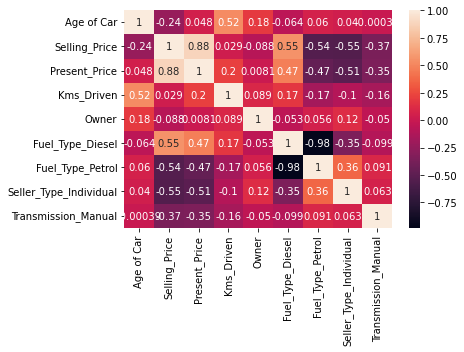

In [17]:
import seaborn as sns
sns.heatmap(final_dataset.corr(),annot=True)

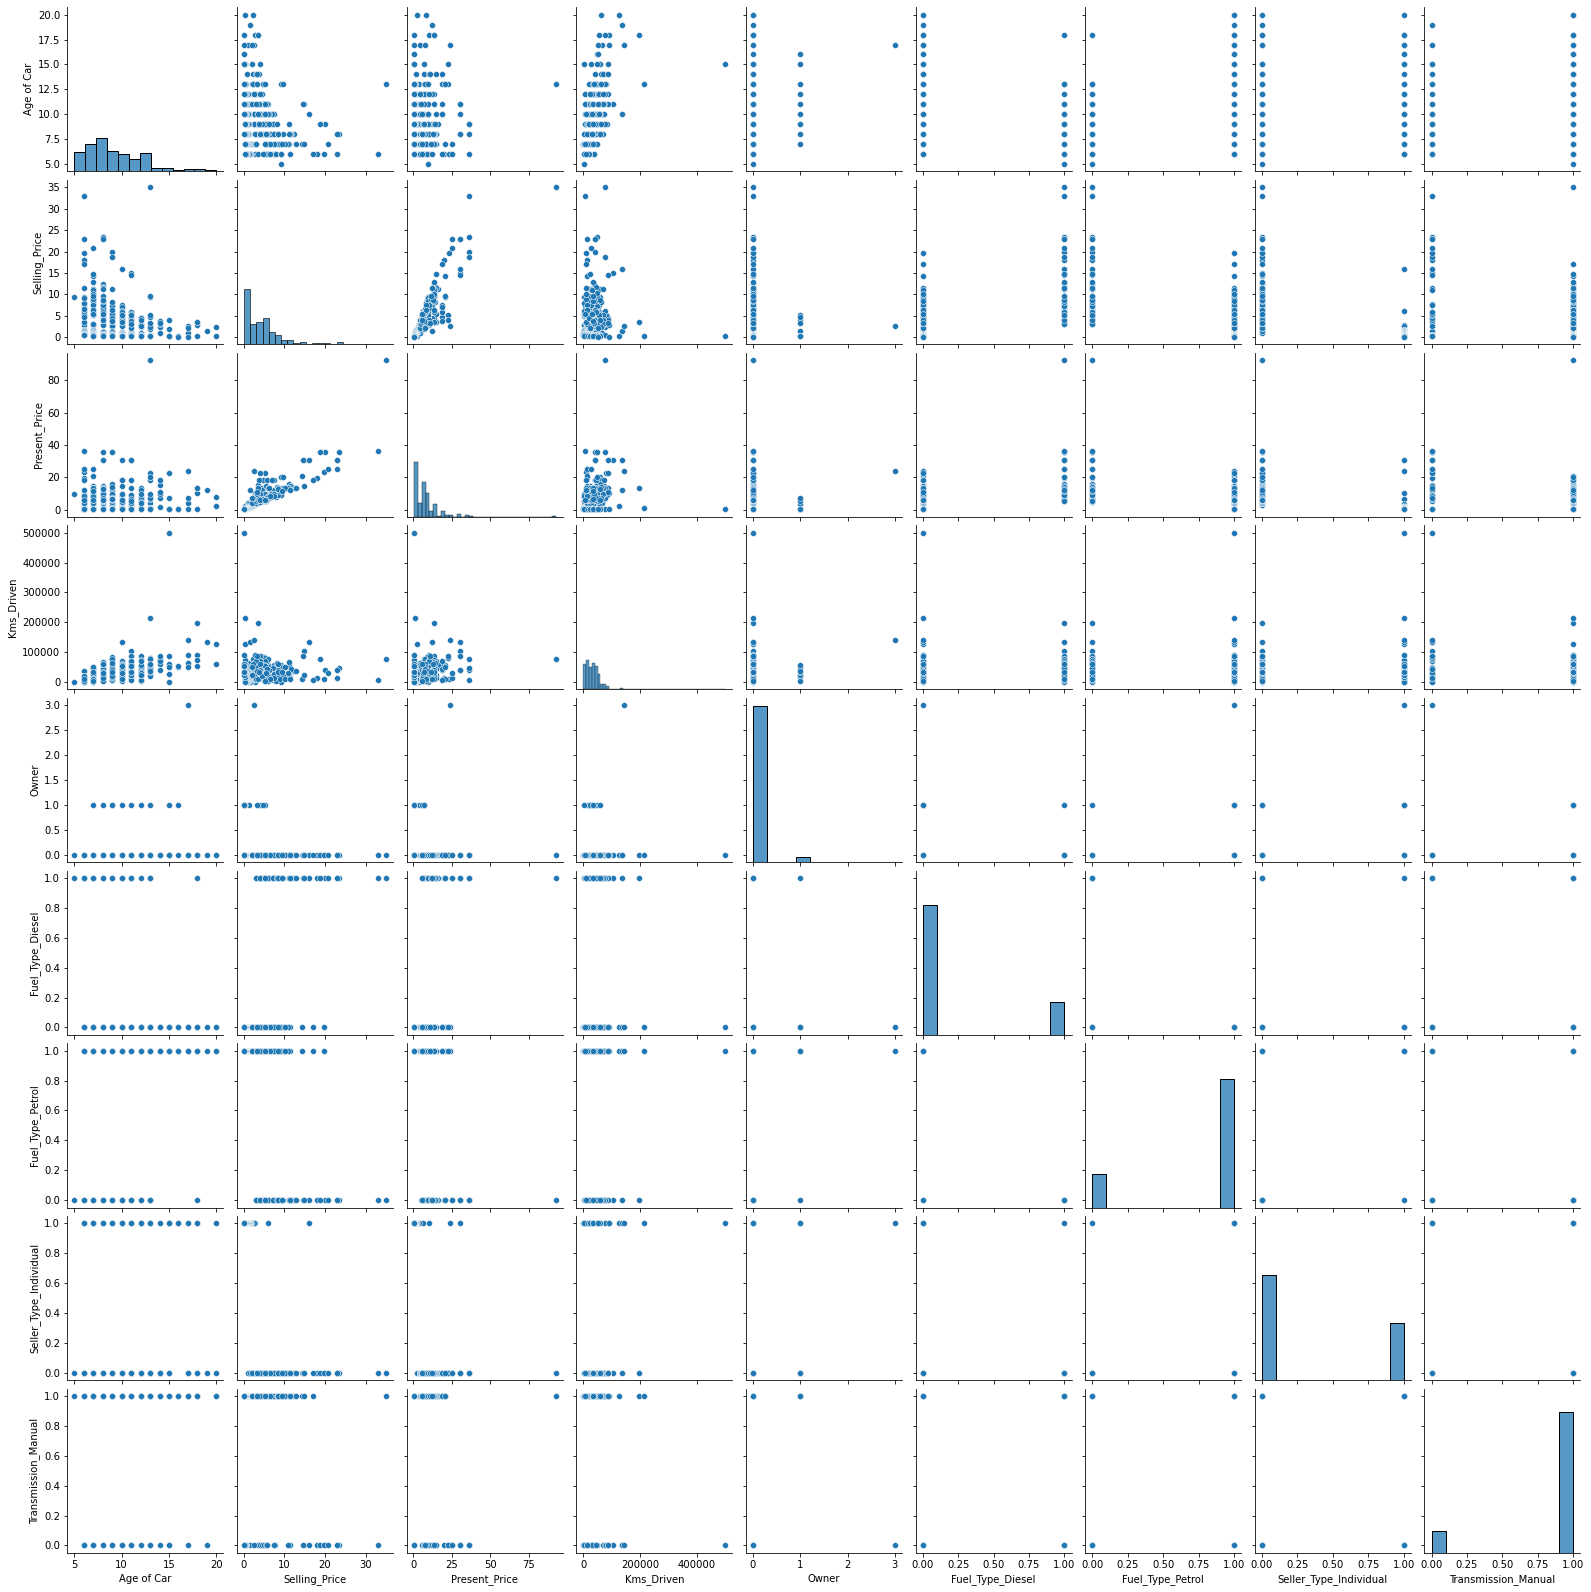

In [18]:
sns.pairplot(final_dataset)

In [19]:
## Independant and Dependant feature
X=final_dataset.drop('Owner',axis=1)
y=final_dataset['Owner']

In [20]:
X.head()

,Age of Car,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,9,3.35,5.59,27000,0,1,0,1
1,10,4.75,9.54,43000,1,0,0,1
2,6,7.25,9.85,6900,0,1,0,1
3,12,2.85,4.15,5200,0,1,0,1
4,9,4.60,6.87,42450,1,0,0,1


In [21]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Owner, dtype: int64

In [22]:
## Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
print(model.fit(X,y))

ExtraTreesRegressor()


In [23]:
print(model.feature_importances_)

[0.16061782 0.19715206 0.33751168 0.16513869 0.02481332 0.02153757
 0.03704377 0.05618509]


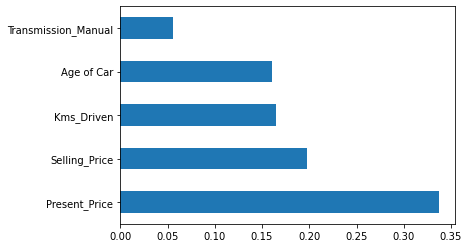

In [24]:
# Plot graph of feature importance for better visualization
import matplotlib.pyplot as plt
feature_importances = pd.Series(model.feature_importances_,index=X.columns)
feature_importances.nlargest(5).plot(kind='barh')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((240, 8), (61, 8), (240,), (61,))

In [26]:
X_train.head()

,Age of Car,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
184,15,0.25,0.750,26000,0,1,1,1
132,6,0.75,0.950,3500,0,1,1,1
194,15,0.20,0.787,50000,0,1,1,1
75,8,3.95,6.800,36000,0,1,0,1
111,7,1.15,1.500,8700,0,1,1,1


In [33]:
from sklearn.ensemble import RandomForestRegressor
ran = RandomForestRegressor()

In [28]:
## Hyperparameters
import numpy as np
n_estimators=[int(x) for x in np.linspace(start = 100, stop = 1200, num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [38]:
## Randomized search CV

# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start = 100, stop = 1200, num=12)]
# Number of features to consider at every split
max_features = ['sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30, num=6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]


In [30]:
from sklearn.model_selection import RandomizedSearchCV

In [39]:
# Create the random grid
random_grid = {'n_estimators':n_estimators,
              'max_features': max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
              }
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['sqrt', 'log2'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [40]:
search = RandomizedSearchCV(estimator = ran,param_distributions = random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [41]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.6s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.6s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [42]:
search.best_params_

{'n_estimators': 700,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 20}

In [44]:
search.best_score_

-0.07462686687197617

In [46]:
predictions=search.predict(X_test)

C:\Users\ICON\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Owner', ylabel='Density'>

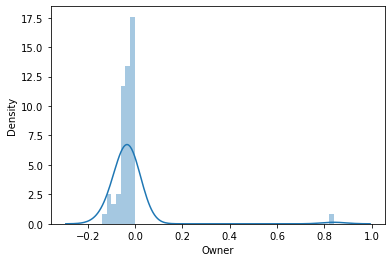

In [47]:
sns.distplot(y_test-predictions)

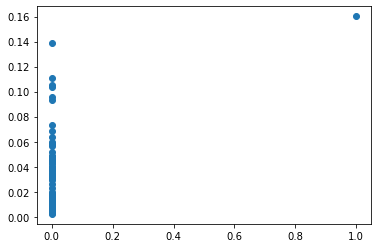

In [48]:
plt.scatter(y_test,predictions)

In [49]:
from sklearn import metrics

In [50]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.051516757594144987
MSE: 0.013878544246063416
RMSE: 0.11780723341995353


In [51]:
import pickle
# open a file, where you want to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(search, file)